# TP réseaux de neurones

Diane Lingrand (diane.lingrand@univ-cotedazur.fr)

Polytech SI4 - CVML - 2022-23

## imports nécessaires pour la suite

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import ensemble
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow.keras.utils

In [3]:
# reading the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)


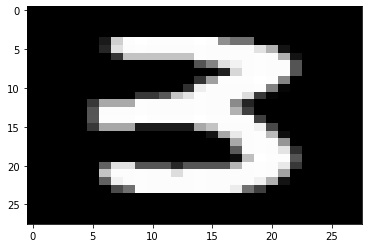

In [4]:
# display a random image from the train dataset (re-run the cell in order to change the image)
import matplotlib.pyplot as plt
i = random.randint(0,len(x_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()

# 1. Un premier MLP

In [ ]:
nbClasses=10
#Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 4 neurons and usual sigmoid activation
...
#softmax for the output using as many neurons as classes 
...

In [ ]:
model.summary()

In [ ]:
#we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop', ....)


In [ ]:

#now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(xTrain, yTrain, epochs=20, batch_size=128)



Que vaut le score F1?

In [ ]:
#is it good? we know the truth: y_test and we will compare to the output of the network
# display different metrics and the confusion matrix


# 2. Convergence

## A t-on laissé le temps à l'algorithme de converger?
Modifiez le nombre d'itérations. Les résultats sont-ils meilleurs?

## Critère d'arrêt autre que le nombre d'itérations

In this small example, we decided, as a default behavior, to stop after 20 epochs. Of course this value can be changed. Another way to deal with that is to use early stopping criterion. All options are described in the keras documentation. Feel free to experiment all options!

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing more than 10-4 with a patience of 20 iterations
# If the last accuracy value is not the best one, we still keep the last results
# In this example, we extracted 20% of the train set for the validation set that will be used to monitor the convergence.

ourCallback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# let's learn the network again !
# We do not know when the training will stop but no more than 2000 epochs.
model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])


A quel 'epoch' l'algorithme s'est-il arrêté ?

## Evolution de la convergence

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping

ourCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
from pandas import DataFrame
history = model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])
pandas.DataFrame(history.history).plot()

NameError: name 'model' is not defined

# 3. Changements de topologie


Est-ce qu'augmenter le nombre de neurones par couche augmente les performances?

In [ ]:
# for you

Est-ce qu'augmenter le nombre de couches de neurones augmente les performances?

In [ ]:
# for you

Si vous observez qu'en augmentant le nombre de couches cachées, les performances chutent, essayez de remplacer l'activiation 'sigmoid' par 'relu'. Est-ce mieux ?

In [ ]:
# for you

# 4. Modifiez les données en considérant FMNIST (Fashion MNIST)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
